In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

In [ ]:
!gdown 14SJbmGsVlF5nCpJ3z1alrTBQNL0qWS7k

Downloading...
From: https://drive.google.com/uc?id=14SJbmGsVlF5nCpJ3z1alrTBQNL0qWS7k
To: /content/Iris.csv
100% 5.11k/5.11k [00:00<00:00, 7.70MB/s]


# **Membaca dataset**

In [ ]:
df = pd.read_csv("Iris.csv").drop("Id", axis = 1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Mengecek jumlah data NULL
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

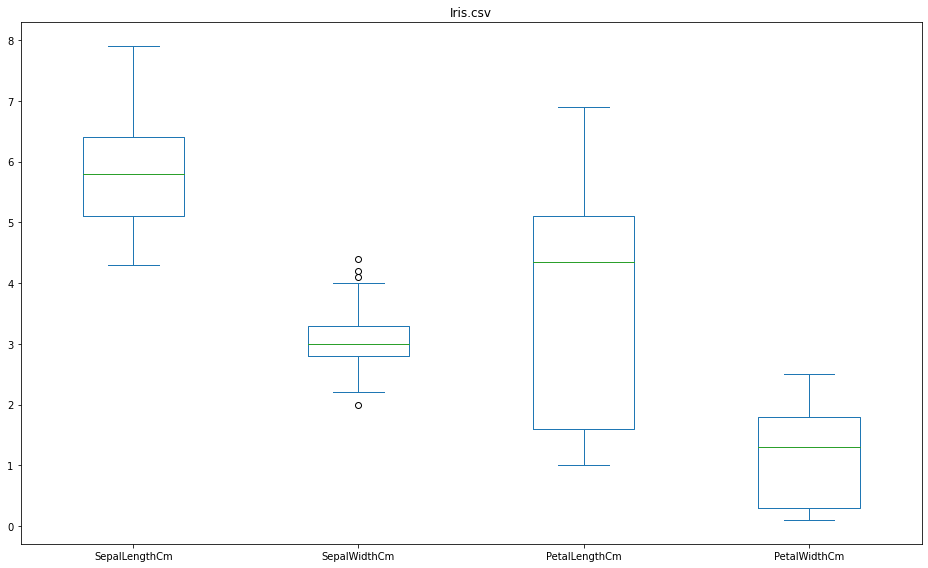

In [ ]:
plt.rcParams["figure.figsize"] = [13, 8]
plt.rcParams["figure.autolayout"] = True
ax = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].plot(kind='box', title='Iris.csv')

# Pre-processing

In [ ]:
# IQR
Q1 = np.percentile(df['SepalWidthCm'], 25,
                   interpolation = 'midpoint')

Q3 = np.percentile(df['SepalWidthCm'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

# Above Upper bound
upper = df['SepalWidthCm'] >= (Q3+1.5*IQR)

print("Upper bound:",upper)
print(np.where(upper))

# Below Lower bound
lower = df['SepalWidthCm'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))

Upper bound: 0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: SepalWidthCm, Length: 150, dtype: bool
(array([15, 32, 33]),)
Lower bound: 0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: SepalWidthCm, Length: 150, dtype: bool
(array([60]),)


## Contoh nilai outliers

In [ ]:
df["SepalWidthCm"][60]

2.0

## Mengubah Nilai outliers

In [ ]:
Q1 = df['SepalWidthCm'].quantile(0.25)
Q3 = df['SepalWidthCm'].quantile(0.75)
IQR = Q3 - Q1

LB = Q1 - (IQR * 1.5)
UB = Q3 + (IQR * 1.5)

df.loc[df['SepalWidthCm'] > UB, "SepalWidthCm"] = UB
df.loc[df['SepalWidthCm'] < LB, "SepalWidthCm"] = LB

## Boxplot setelah perubahan nilai outliers

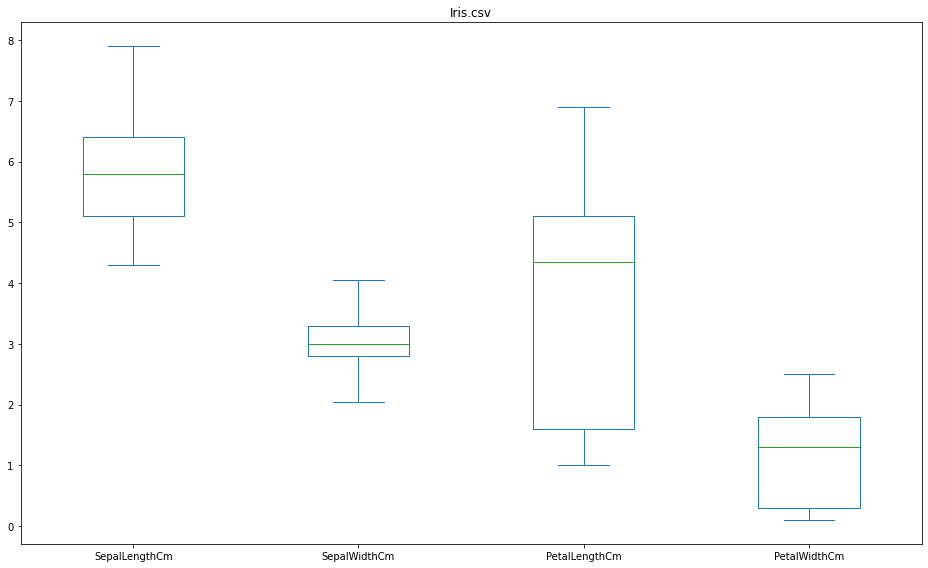

In [ ]:
plt.rcParams["figure.figsize"] = [13, 8]
plt.rcParams["figure.autolayout"] = True
ax = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].plot(kind='box', title='Iris.csv')

In [ ]:
df["SepalWidthCm"][60]

2.05

## Normalisasi

In [ ]:
#normalisasi
def minMaxScaling(df) :
    return (df.iloc[:,:4] - df.iloc[:,:4].min()) / (df.iloc[:,:4].max() - df.iloc[:,:4].min())

# def standardScaling(df) :
#     return (df.iloc[:,1:] - df.iloc[:,1:].mean() / df.iloc[:,1:].std())

dataNormalized = minMaxScaling(df)
display("hanya untuk melihat jika dilakukan normalisasi dengan minmax scalling")
#dataNormalized.insert(loc=3, column = "Species", value=update_df.iloc[:,:1])
display(dataNormalized)

'hanya untuk melihat jika dilakukan normalisasi dengan minmax scalling'

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.725,0.067797,0.041667
1,0.166667,0.475,0.067797,0.041667
2,0.111111,0.575,0.050847,0.041667
3,0.083333,0.525,0.084746,0.041667
4,0.194444,0.775,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.475,0.711864,0.916667
146,0.555556,0.225,0.677966,0.750000
147,0.611111,0.475,0.711864,0.791667
148,0.527778,0.675,0.745763,0.916667


# Split dataset

In [ ]:
# Split dataset to train and test data
test_size = 0.2
training_data = df.sample(frac = 1-test_size, random_state = 84)
testing_data = df.drop(training_data.index)

training_data.reset_index(drop=True, inplace=True)
testing_data.reset_index(drop=True, inplace=True)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 120
No. of testing examples: 30


In [ ]:
training_data.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.0,3.5,1.3,0.3,Iris-setosa
1,5.8,2.7,5.1,1.9,Iris-virginica
2,7.7,3.0,6.1,2.3,Iris-virginica


In [ ]:
testing_data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.3,Iris-setosa
1,5.0,3.4,1.6,0.4,Iris-setosa
2,4.8,3.0,1.4,0.3,Iris-setosa
3,5.1,3.8,1.6,0.2,Iris-setosa
4,4.6,3.2,1.4,0.2,Iris-setosa
5,5.3,3.7,1.5,0.2,Iris-setosa
6,6.9,3.1,4.9,1.5,Iris-versicolor
7,6.3,3.3,4.7,1.6,Iris-versicolor
8,4.9,2.4,3.3,1.0,Iris-versicolor
9,6.6,2.9,4.6,1.3,Iris-versicolor


In [ ]:
testing_data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
25,6.7,3.3,5.7,2.1,Iris-virginica
26,7.4,2.8,6.1,1.9,Iris-virginica
27,6.4,3.1,5.5,1.8,Iris-virginica
28,6.7,3.0,5.2,2.3,Iris-virginica
29,6.5,3.0,5.2,2.0,Iris-virginica


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


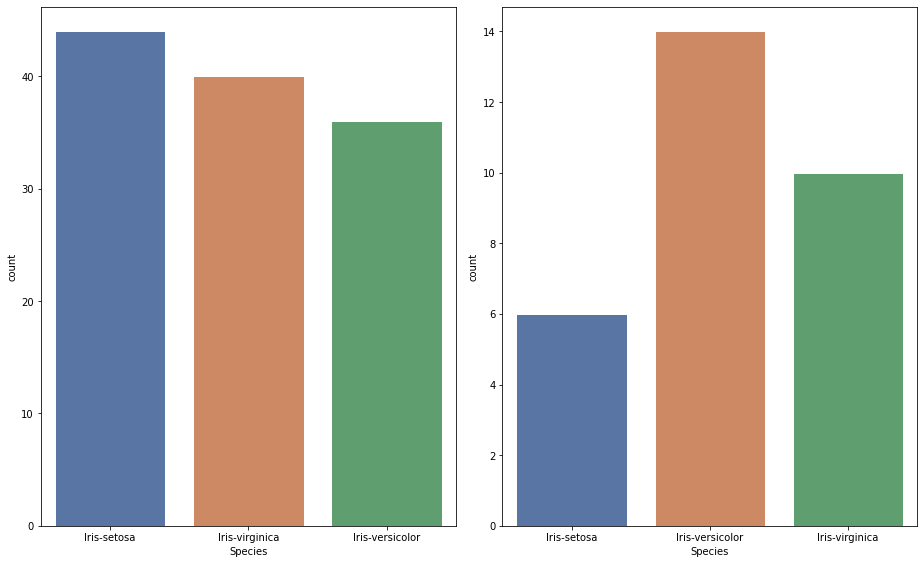

In [ ]:
fig, axs = plt.subplots(ncols=2)
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(training_data['Species'], ax=axs[0])
sns.countplot(testing_data['Species'], ax=axs[1])

# Perhitungan jarak

In [ ]:
def euclidean_distance(x, y):
    #d = √[(x2–x1)^2+(y2–y1)^2]
    dist = 0
    for i in range(len(y)):
        dist += (x[i] - y[i])**2

    return dist ** (1/2)

def manhattan_distance(x, y):
    #d = |x2–x1|+|y2–y1|
    dist = 0
    for i in range(len(x)):
        dist += abs(x[i] - y[i])

    return dist

def minkowski_distance(x, y, p=2):
    #d = h√[(x2–x1)^2+(y2–y1)^2]
    dist = 0
    for i in range(len(x)):
        dist += abs(x[i] - y[i]) ** p

    return dist ** (1/p)

def supremum_distance(x, y):
    #d = max|xik-yjk|
    dist = []
    for i in range(len(x)):
        dist.append(abs(x[i] - y[i]))

    return max(dist)

In [ ]:
def get_distance(x, y):
    euclidean, manhattan, minkowski, supremum = [], [], [], []

    for i in range(len(x)):
        minkowski.append([minkowski_distance(x.iloc[i].tolist(), y), training_data['Species'][i]])
        manhattan.append([manhattan_distance(x.iloc[i].tolist(), y), training_data['Species'][i]])
        euclidean.append([euclidean_distance(x.iloc[i].tolist(), y), training_data['Species'][i]])
        supremum.append([supremum_distance(x.iloc[i].tolist(), y), training_data['Species'][i]])

    return euclidean, manhattan, minkowski, supremum

# Perhitungan KNN

In [ ]:
# Copy dataset untuk input knn (remove species column)
training_data_input = training_data.drop(columns=["Species"])
testing_data_input = testing_data.drop(columns=["Species"])

In [ ]:
def knn(x, y, k):
    euclidean, manhattan, minkowski, supremum = get_distance(x, y)

    euclidean = sorted(euclidean)[:k]
    manhattan = sorted(manhattan)[:k]
    minkowski = sorted(minkowski)[:k]
    supremum = sorted(supremum)[:k]

    distances = [['Euclidean', euclidean[:k]],
                  ['Manhattan', manhattan[:k]],
                  ['Minkowski', minkowski[:k]],
                  ['Supremum', supremum[:k]]]

    return distances

In [ ]:
def scoring(listDistances, idxTest, countEuclidean, countManhattan, countMinkowski, countSupremum):
  for i in range(len(listDistances)):
    if i == 0 and vote(listDistances[i][1]) == testing_data["Species"][idxTest]:
      countEuclidean +=1
    if i == 1 and vote(listDistances[i][1]) == testing_data["Species"][idxTest]:
      countManhattan += 1
    if i == 2 and vote(listDistances[i][1]) == testing_data["Species"][idxTest]:
      countMinkowski += 1
    if i == 3 and vote(listDistances[i][1]) == testing_data["Species"][idxTest]:
      countSupremum += 1

  return countEuclidean, countManhattan, countMinkowski, countSupremum

def vote(listVote):
  irisVirg = 0
  irisVersic = 0
  irisSetos = 0

  # Count
  for i in range(len(listVote)):
    if listVote[i][1] == "Iris-virginica":
      irisVirg += 1
    elif listVote[i][1] == "Iris-versicolor":
      irisVersic += 1
    else:
      irisSetos += 1

  # Vote
  if (irisVirg > irisVersic and irisVirg > irisSetos):
    return "Iris-virginica"
  elif (irisVersic > irisVirg and irisVersic > irisSetos):
    return "Iris-versicolor"
  else:
    return "Iris-setosa"

def show_elbow_plot(listError):
  # Bentuk List: [[k, errorEuclid, errorManhattan, errorMinkowski, errorSupremum],
  #              [k, errorEuclid, errorManhattan, errorMinkowski, errorSupremum], ...]
  x = []
  y1 = []
  y2 = []
  y3 = []
  y4 = []
  for i in range(len(listError)):
    x.append(listError[i][0])
    y1.append(listError[i][1])
    y2.append(listError[i][2])
    y3.append(listError[i][3])
    y4.append(listError[i][4])

  plt.plot(x, y1, label = "Euclidean")
  plt.plot(x, y2, label = "Manhattan")
  plt.plot(x, y3, label = "Minkowski")
  plt.plot(x, y4, label = "Supremum")

  print("Euclid", y1)
  print("Manhattan",y2)
  print("Minkowski",y3)
  print("Supremum",y4)

  # X Axis
  plt.xlabel('k')
  # Y Axis
  plt.ylabel('errors')
  # Graph Title
  plt.title('Error berdasarkan k')

  # Show Legend
  plt.legend()

  # Show Plot
  plt.show()

# Main

In [ ]:
errorListAll = []
for kCount in range(1, 11):
  ctr = 1
  countEuclidean = 0
  countManhattan = 0
  countMinkowski = 0
  countSupremum = 0
  errorList = []
  for i in range(len(testing_data_input)):
    print("\n")
    print(f"=========={ctr}==========")
    input = testing_data_input.iloc[i].tolist()
    distances = knn(training_data_input, input, kCount)
    countEuclidean, countManhattan, countMinkowski, countSupremum = scoring(distances, i, countEuclidean, countManhattan, countMinkowski, countSupremum)

    for method in distances:
      print(f'Metode: {method[0]}')
      # iris = []

      for i, distance in enumerate(method[1]):
          print(f'{i+1}. {distance[1]}, Distance: {round(distance[0], 2)}')
          # iris.append(distance[1])

      # iris = pd.DataFrame(iris)
      # iris.to_excel(f'{method[0]}.xls', index=False, header=False)
    ctr += 1

  # Ambil accuracy tiap metode
  accuracyEuclid = countEuclidean / testing_data.shape[0]
  accuracyManhattan = countManhattan / testing_data.shape[0]
  accuracyMinkowski = countMinkowski / testing_data.shape[0]
  accuracySupremum = countSupremum / testing_data.shape[0]

  # Setor data ke error list
  errorList = [kCount, 1-accuracyEuclid, 1-accuracyManhattan, 1-accuracyMinkowski, 1-accuracySupremum]
  errorListAll.append(errorList)

Streaming output truncated to the last 5000 lines.
3. Iris-virginica, Distance: 0.7
4. Iris-virginica, Distance: 0.7
5. Iris-virginica, Distance: 0.8
6. Iris-virginica, Distance: 0.8
Metode: Minkowski
1. Iris-virginica, Distance: 0.14
2. Iris-virginica, Distance: 0.24
3. Iris-virginica, Distance: 0.44
4. Iris-virginica, Distance: 0.46
5. Iris-virginica, Distance: 0.47
6. Iris-virginica, Distance: 0.51
Metode: Supremum
1. Iris-virginica, Distance: 0.1
2. Iris-virginica, Distance: 0.2
3. Iris-virginica, Distance: 0.3
4. Iris-virginica, Distance: 0.4
5. Iris-virginica, Distance: 0.4
6. Iris-virginica, Distance: 0.4


==========29==========
Metode: Euclidean
1. Iris-virginica, Distance: 0.24
2. Iris-virginica, Distance: 0.36
3. Iris-virginica, Distance: 0.37
4. Iris-virginica, Distance: 0.42
5. Iris-virginica, Distance: 0.42
6. Iris-virginica, Distance: 0.55
Metode: Manhattan
1. Iris-virginica, Distance: 0.4
2. Iris-virginica, Distance: 0.6
3. Iris-virginica, Distance: 0.6
4. Iris-virginic

Euclid [0.06666666666666665, 0.06666666666666665, 0.033333333333333326, 0.09999999999999998, 0.06666666666666665, 0.09999999999999998, 0.06666666666666665, 0.06666666666666665, 0.033333333333333326, 0.06666666666666665]
Manhattan [0.06666666666666665, 0.06666666666666665, 0.033333333333333326, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665]
Minkowski [0.06666666666666665, 0.06666666666666665, 0.033333333333333326, 0.09999999999999998, 0.06666666666666665, 0.09999999999999998, 0.06666666666666665, 0.06666666666666665, 0.033333333333333326, 0.06666666666666665]
Supremum [0.0, 0.06666666666666665, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.06666666666666665, 0.0, 0.06666666666666665, 0.033333333333333326, 0.06666666666666665]


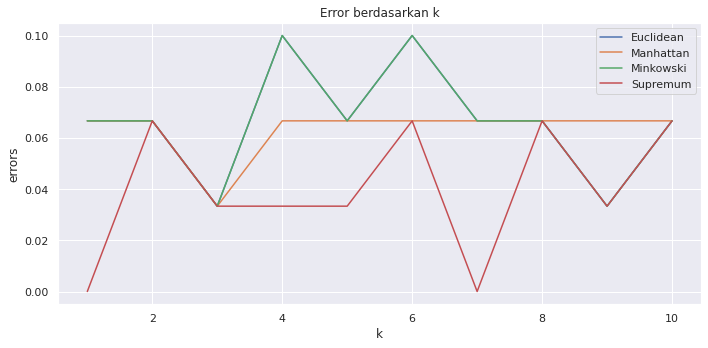

In [ ]:
show_elbow_plot(errorListAll)